Chapter 33
# 高斯混合聚类
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [21]:
from matplotlib.patches import Ellipse
# 定义可视化函数
def make_ellipses(gmm, ax):
    # 可视化不同簇
    for j in range(0,K):
        # 四种不同的协方差矩阵
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[j]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[j])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) 
            covariances = covariances*gmm.covariances_[j]
        
        # 用奇异值分解完成特征值分解
        U, S, V_T = np.linalg.svd(covariances)
        # 计算长轴、短轴长度
        major, minor = 2*np.sqrt(S)    # np.sqrt(S) 表示半长轴
        print('major: ',major)
        print('minor: ',minor)
        print('U, S, V_T: ', U, "\n", S, "\n", V_T)
        print('j: ', j)
        print("----------------------------------------------------------------")
        
        # 计算椭圆长轴旋转角度
        angle = np.arctan2(U[1,0], U[0,0])
        angle = 180*angle/np.pi
        
        # 多元高斯分布中心
        ax.plot(gmm.means_[j, 0],gmm.means_[j, 1],color='k', marker='x', markersize=10)

        # 绘制半长轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1], U[0,0], U[1,0], scale=5/major)
        # scale: Scales the length of the arrow inversely
        # 绘制半短轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1], U[0,1], U[1,1], scale=5/minor)
        
        # 绘制椭圆
        for scale in np.array([3, 2, 1]):
            ell = Ellipse(gmm.means_[j, :2], scale*major, scale*minor, color=rgb[j, :], alpha=0.18)
            ax.add_artist(ell)

    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

major:  1.0228378427340425
minor:  0.4668136071086818
U, S, V_T:  [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]] 
 [0.26154931 0.05447874] 
 [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]]
j:  0
----------------------------------------------------------------
major:  1.0228378427340425
minor:  0.4668136071086818
U, S, V_T:  [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]] 
 [0.26154931 0.05447874] 
 [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]]
j:  1
----------------------------------------------------------------
major:  1.0228378427340425
minor:  0.4668136071086818
U, S, V_T:  [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]] 
 [0.26154931 0.05447874] 
 [[-0.85274465 -0.52232801]
 [-0.52232801  0.85274465]]
j:  2
----------------------------------------------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
major:  0.5915523699357044
minor:  0.5915523699357044
U, S, V_T:  [[1. 0.]
 [0. 1.]] 
 [0.08748355 0.08748355] 
 [[1. 0

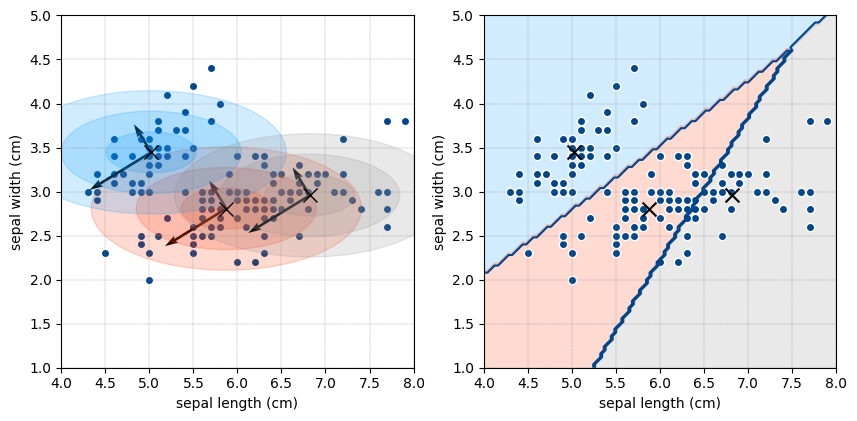

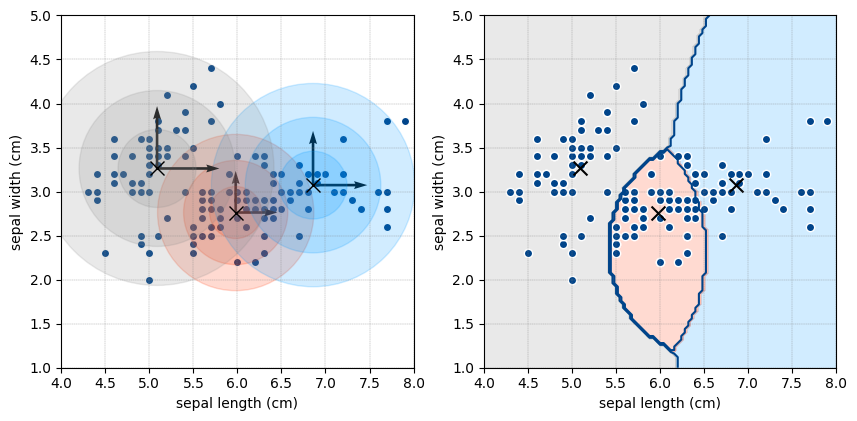

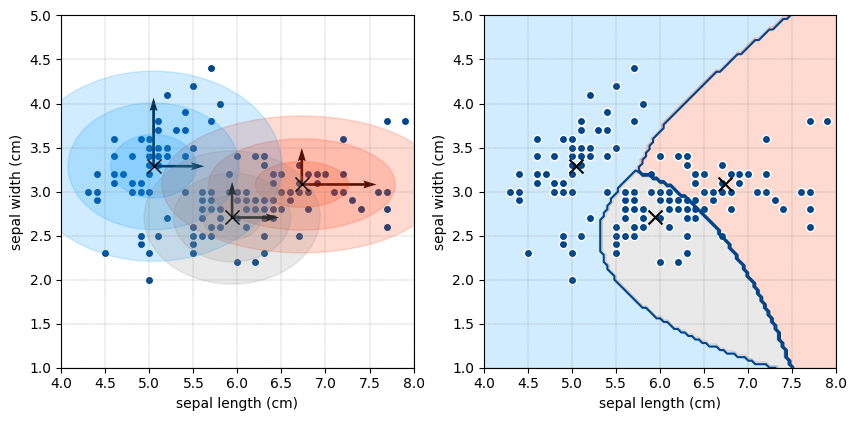

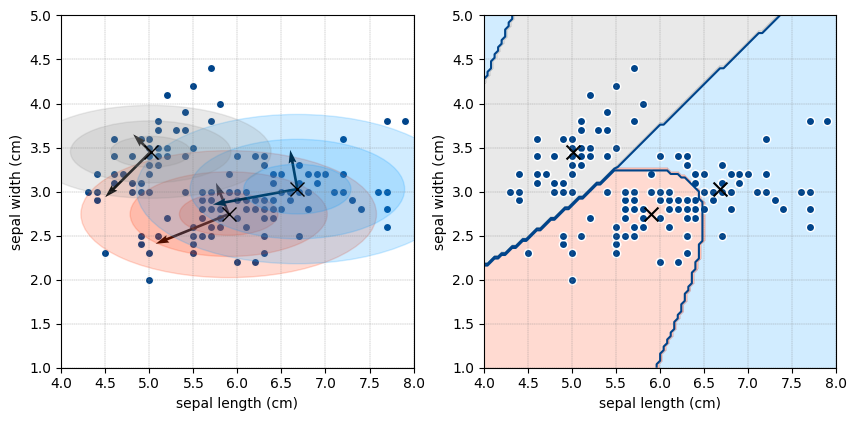

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture

# 创建色谱
rgb = [[255, 51, 0], [0, 153, 255], [138,138,138]]
rgb = np.array(rgb)/255.
cmap_bold = ListedColormap(rgb)

# 生成网格化数据
x1_array = np.linspace(4,8,101)
x2_array = np.linspace(1,5,101)
xx1, xx2 = np.meshgrid(x1_array,x2_array)

# 鸢尾花数据
iris = datasets.load_iris();
X = iris.data[:, :2]

K = 3 # 簇数
# 协方差类型
covariance_types = ['tied', 'spherical', 'diag', 'full']

for covariance_type in covariance_types:
    # 采用GMM聚类
    gmm = GaussianMixture(n_components=K, covariance_type=covariance_type)
    gmm.fit(X)
    Z = gmm.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # 可视化
    fig = plt.figure(figsize = (10,5)) 
    ax = fig.add_subplot(1,2,1)
    ax.scatter(x=X[:, 0], y=X[:, 1], color=np.array([0, 68, 138])/255., alpha=1.0, linewidth=1, edgecolor=[1,1,1])
    # 绘制椭圆和向量
    make_ellipses(gmm, ax)
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0]); ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')

    # 绘制决策图
    ax = fig.add_subplot(1,2,2)
    ax.contourf(xx1, xx2, Z, cmap=cmap_bold, alpha=0.18)
    ax.contour(xx1, xx2, Z, levels=[0,1,2], colors=np.array([0, 68, 138])/255.)
    ax.scatter(x=X[:, 0], y=X[:, 1], color=np.array([0, 68, 138])/255., alpha=1.0, linewidth=1, edgecolor=[1,1,1])
    centroids = gmm.means_
    ax.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, linewidths=1.5, color="k")
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0]); ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')
